# 📧 Email Spam Classifier using Naive Bayes
Google Colab-ready Mini Project (Intermediate Level)

In [ ]:
# STEP 0: Upload Dataset
#from google.colab import files
#uploaded = files.upload()

In [3]:
# STEP 1: Imports
import pandas as pd
import re
from sklearn.model_selection import train_test_split
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.naive_bayes import MultinomialNB
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix
from sklearn.preprocessing import LabelEncoder
from sklearn.utils import resample
import matplotlib.pyplot as plt
import seaborn as sns


In [4]:
# STEP 2: Read and Clean Dataset
df = pd.read_csv('mail_data.csv')
df = df.rename(columns={'Category': 'label', 'Message': 'message'})
df['label'] = df['label'].str.strip().str.lower()
le = LabelEncoder()
df['label'] = le.fit_transform(df['label'])
def clean_text(text):
    text = text.lower()
    text = re.sub(r'\d+', '', text)
    text = re.sub(r'\W', ' ', text)
    text = re.sub(r'\s+', ' ', text)
    return text.strip()
df['message'] = df['message'].astype(str).apply(clean_text)
ham = df[df['label'] == 0]
spam = df[df['label'] == 1]
spam_upsampled = resample(spam, replace=True, n_samples=len(ham), random_state=3)
df_balanced = pd.concat([ham, spam_upsampled])

In [5]:
# STEP 3: Split and Vectorize
X = df_balanced['message']
Y = df_balanced['label']
X_train, X_test, Y_train, Y_test = train_test_split(X, Y, test_size=0.2, stratify=Y, random_state=3)
vectorizer = TfidfVectorizer(stop_words='english', lowercase=True, max_features=3000)
X_train_features = vectorizer.fit_transform(X_train)
X_test_features = vectorizer.transform(X_test)

In [6]:
# STEP 4: Train Model
model = MultinomialNB()
model.fit(X_train_features, Y_train)

,alpha,1.0
,force_alpha,True
,fit_prior,True
,class_prior,None


✅ Accuracy: 0.9694300518134715
📊 Classification Report:               precision    recall  f1-score   support

           0       0.97      0.97      0.97       965
           1       0.97      0.97      0.97       965

    accuracy                           0.97      1930
   macro avg       0.97      0.97      0.97      1930
weighted avg       0.97      0.97      0.97      1930



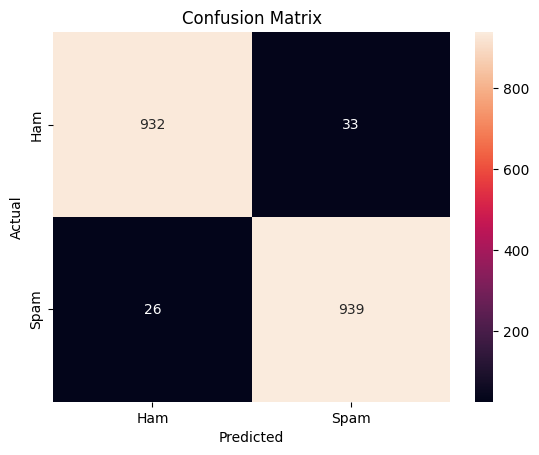

In [7]:
# STEP 5: Evaluate
y_pred = model.predict(X_test_features)
print('✅ Accuracy:', accuracy_score(Y_test, y_pred))
print('📊 Classification Report:', classification_report(Y_test, y_pred))
cm = confusion_matrix(Y_test, y_pred)
sns.heatmap(cm, annot=True, fmt='d', xticklabels=['Ham', 'Spam'], yticklabels=['Ham', 'Spam'])
plt.title('Confusion Matrix')
plt.xlabel('Predicted')
plt.ylabel('Actual')
plt.show()

In [8]:
# STEP 6: Prediction Function
def predict_mail(mail_text):
    cleaned = clean_text(mail_text)
    input_features = vectorizer.transform([cleaned])
    prediction = model.predict(input_features)[0]
    probability = model.predict_proba(input_features)[0][1]
    print('✉️ Input:', mail_text)
    print('📌 Prediction:', '🚨 Spam' if prediction == 1 else '✅ Ham')
    print('📈 Spam Probability: {:.2f}%'.format(probability * 100))

In [9]:
# STEP 7: Colab Input Box
from IPython.display import display
import ipywidgets as widgets
text_box = widgets.Text(value='', placeholder='Enter your email content...', description='Email:', layout=widgets.Layout(width='100%'))
display(text_box)
def on_submit(change):
    if change.new.strip() != '':
        predict_mail(change.new)
text_box.observe(on_submit, names='value')

ModuleNotFoundError: No module named 'ipywidgets'

In [11]:
import pickle
import os

# Create directory if it doesn't exist
os.makedirs('model', exist_ok=True)

# Save model
with open('model/spam_model.pkl', 'wb') as f:
    pickle.dump(model, f)

# Save vectorizer
with open('model/vectorizer.pkl', 'wb') as f:
    pickle.dump(vectorizer, f)
